In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

,Resistance 1: value,Resistance 2: value,CPE Q 1: value,CPE Alpha 1: value,CPE Q 2: value,CPE Alpha 2: value
0,14.813769,5225.872636,1.298430e-07,0.861578,0.000003,0.714636
1,15.048609,5186.988936,1.310843e-07,0.861563,0.000003,0.720756
2,14.402511,5169.237605,1.318337e-07,0.861710,0.000003,0.722047
3,14.808192,5166.634157,1.326788e-07,0.861513,0.000003,0.725108


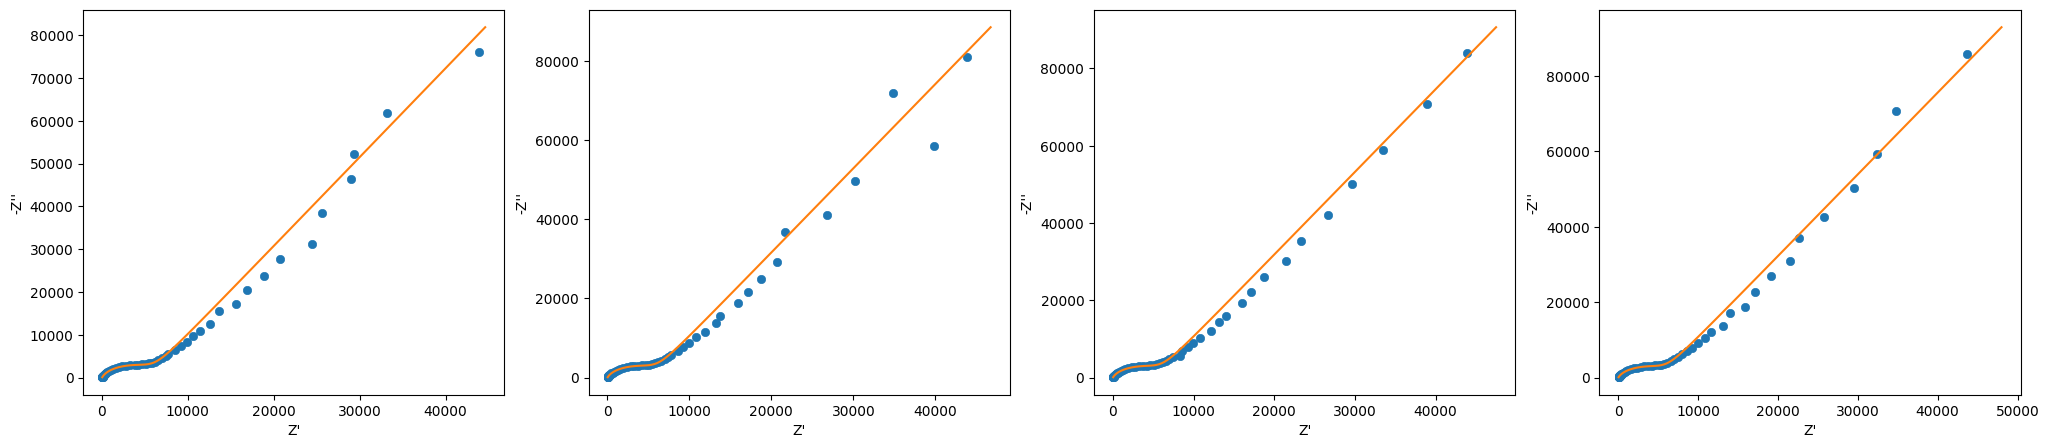

In [17]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Impedance\nanosce\TiN\On TiN old data\Fit'
info = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Impedance\nanosce\TiN\On TiN old data\Fit\Fit.txt'
files = [os.path.join(path, i) for i in os.listdir(path) if i != 'Fit.txt']
col = ["Frequency (Hz)", "Z'", "-Z''", "Fit Frequency (Hz)", "Fit Z'", "Fit -Z''" ]
col2 = ['Resistance 1: value',	'CPE Q 1: value',	'CPE Alpha 1: value',	'Resistance 2: value',	'CPE Q 2: value',	'CPE Alpha 2: value']
fig, ax = plt.subplots(1,4, figsize = (25,5))

n = 0
for i in files:
    df = pd.read_csv(i, skiprows=4, sep = '\t', names=col)
    df[col[2]] = -df[col[2]]
    df[col[5]] = -df[col[5]]
    sns.scatterplot(data = df, x = col[1], y = col[2], ax = ax[n], edgecolor = None)
    sns.lineplot(data = df, x = col[4], y = col[5], ax = ax[n], color = 'tab:orange')
    n += 1
df_info = pd.read_csv(info, skiprows=2, sep = '\t', usecols=[13,16,19,22,25,28])
df_info

# ax[0].legend(title = 'Temperature (°C)')

# df = pd.read_csv(os.path.join(path, 'values.txt'), skiprows = 2, sep = '\t', usecols=[13,16,19,22,25,28])
# df['Temperature'] = label
# sns.barplot(data = df, x = col2[6], y = col2[0], ax = ax[1]) #, hue = col2[3])
# sns.barplot(data = df, x = col2[6], y = col2[3], ax = ax[2])


,Resistance 1: value,CPE Q 1: value,CPE Alpha 1: value,Resistance 2: value,CPE Q 2: value,CPE Alpha 2: value,Temperature
0,3.685587e+06,6.327461e-09,0.716285,1.679985e+06,1.337065e-10,0.998508,-10
1,3.180385e+06,2.011263e-08,0.639847,1.735527e+06,2.678811e-10,0.952647,0
2,4.204870e+05,2.409532e-07,0.538763,2.580213e+05,1.004980e-09,0.842878,40


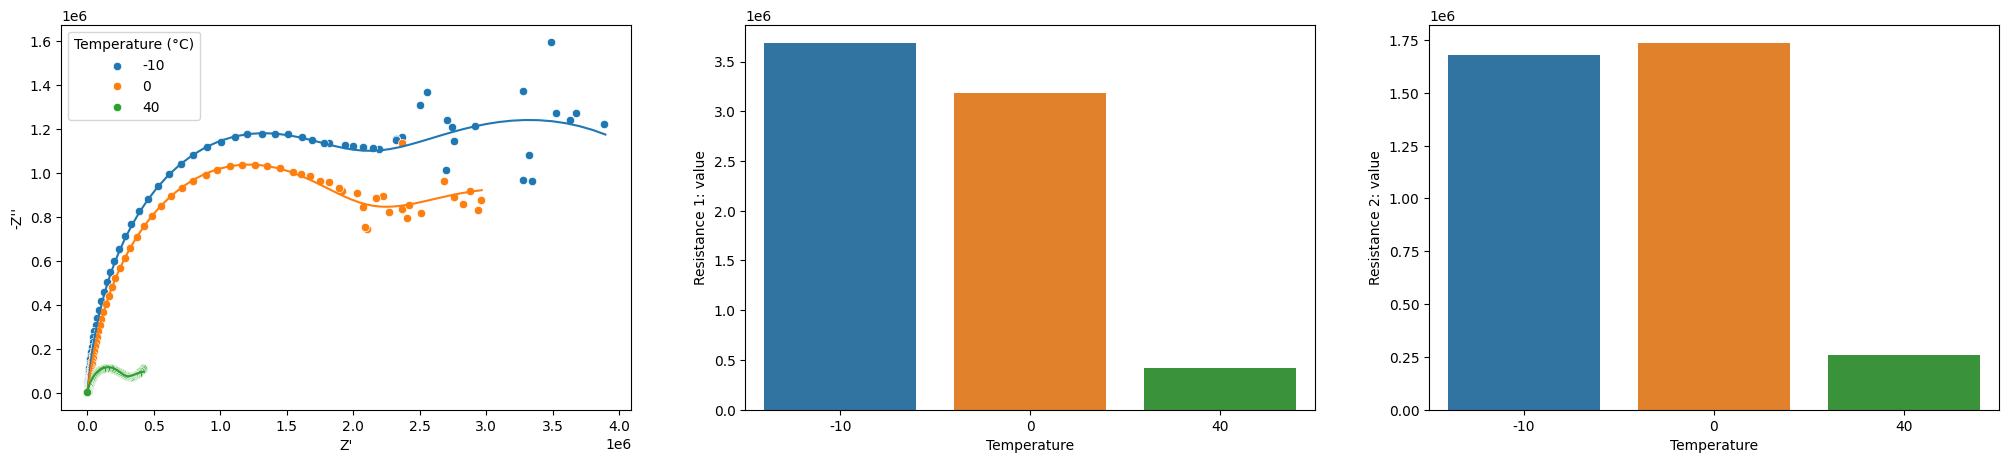

In [3]:
# path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Impedance\nanosce\Dep5dot1\Fit'
path = r''
files = [os.path.join(path, i) for i in os.listdir(path) if i != 'values.txt']
col = ["Frequency (Hz)", "Z'", "-Z''", "Fit Frequency (Hz)", "Fit Z'", "Fit -Z''" ]
col2 = ['Resistance 1: value',	'CPE Q 1: value',	'CPE Alpha 1: value',	'Resistance 2: value',	'CPE Q 2: value',	'CPE Alpha 2: value',	'Temperature']
label = [-10, 0, 40]
fig, ax = plt.subplots(1,3, figsize = (25,5))

n = 0
for i in files:
    df = pd.read_csv(i, skiprows=4, sep = '\t', names=col)
    df[col[2]] = -df[col[2]]
    df[col[5]] = -df[col[5]]
    sns.scatterplot(data = df, x = col[1], y = col[2], label = label[n], ax = ax[0])
    sns.lineplot(data = df, x = col[4], y = col[5], ax = ax[0])
    n += 1
ax[0].legend(title = 'Temperature (°C)')

df = pd.read_csv(os.path.join(path, 'values.txt'), skiprows = 2, sep = '\t', usecols=[13,16,19,22,25,28])
df['Temperature'] = label
sns.barplot(data = df, x = col2[6], y = col2[0], ax = ax[1]) #, hue = col2[3])
sns.barplot(data = df, x = col2[6], y = col2[3], ax = ax[2])
df

0.0003183192742320548


,Temperature,Zarc Resistance 1: value,Zarc Tau 1: value,Zarc CPE alpha 1: value,CPE Q 1: value,CPE Alpha 1: value,Conductivity (S/cm)
0,20.0,1.833773e+07,0.000883,0.918432,3.451666e-09,0.717544,3.471741e-10
1,25.0,3.438537e+06,0.000325,0.915029,3.831874e-08,0.602715,1.851481e-09
2,30.0,1.182086e+07,0.000514,0.919587,4.281633e-09,0.663980,5.385720e-10
3,40.0,1.053073e+07,0.000338,0.945935,4.403379e-09,0.630696,6.045532e-10


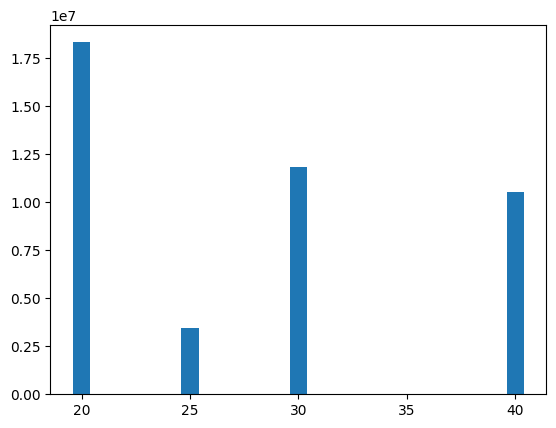

In [13]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Impedance\nanosce\Sample9\Dot1\fit.txt'
df = pd.read_csv(path, skiprows=2, sep = '\t', usecols=[0,13,16,19,22,25])
col = ['Temperature',	'Zarc Resistance 1: value',	'Zarc Tau 1: value',	'Zarc CPE alpha 1: value',	'CPE Q 1: value',	'CPE Alpha 1: value']
fig, ax = plt.subplots()
thickness = 8e-4
area = 0.12566

def conductivity(d, r, a):
    return d/(r * a)

df['Conductivity (S/cm)'] = conductivity(thickness, df[col[1]], area)

ax.bar(x = df[col[0]], height = df[col[1]])

aaa = conductivity(thickness, 20, area)
print(aaa)
df

Raw Data from LCR

,Frequency (Hz),|Z|,Theta (°),Temperature (°C),Z' ($\Omega$),-Z'' ($\Omega$)
0,1000000.000000,675.915,-75.7243,10,166.672539,655.043015
1,896469.785048,753.124,-76.5744,10,174.862229,732.542804
2,803658.075505,837.749,-77.3444,10,183.542572,817.395566
3,720455.182200,930.817,-78.0480,10,192.764910,910.638225
4,645866.302324,1032.960,-78.6769,10,202.812899,1012.854032
...,...,...,...,...,...,...
95,30.966161,651632.000,-12.0445,50,637286.860187,135976.914426
96,27.760228,660338.000,-12.2008,50,645422.908311,139554.805259
97,24.886205,662447.000,-11.7497,50,648566.442447,134898.471233
98,22.309731,675089.000,-11.5517,50,661414.673330,135187.972189


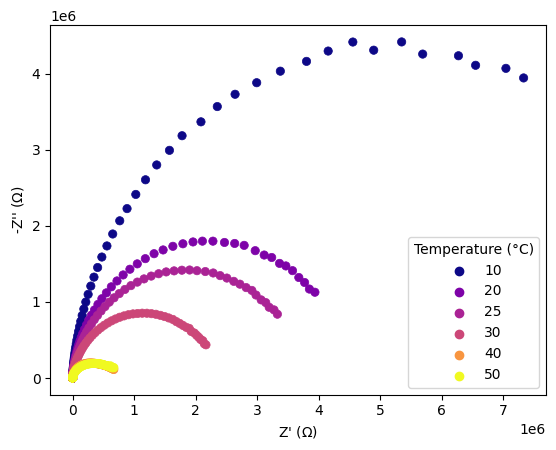

In [5]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Impedance\nanosce\Sample9\Dot1\2nd run'
files = [os.path.join(path, i) for i in os.listdir(path)]
c = ['Frequency (Hz)', '|Z|', 'Theta (°)', 'Temperature (°C)']
df_temp_sweep = pd.DataFrame()
for i in files:
    df = pd.read_csv(i, skiprows=2, usecols=[0,1,2,4], names = c)
    df["Z' ($\Omega$)"] = df[c[1]] * np.cos(np.radians(df[c[2]]))
    df["-Z'' ($\Omega$)"] = df[c[1]] * -np.sin(np.radians(df[c[2]]))
    df_temp_sweep = pd.concat([df_temp_sweep, df])



sns.scatterplot(data = df_temp_sweep, x = "Z' ($\Omega$)", y = "-Z'' ($\Omega$)", hue = c[3], edgecolor = None, palette = 'plasma')

df_temp_sweep